# Face Detection

#### Project Description
In this hands-on project, the goal is to build a face detection model which includes building a face detector to locate the position of a face in an image.

#### Dataset: WIDER Face Dataset
WIDER FACE dataset is a face detection benchmark dataset, of which images are selected from the publicly available WIDER dataset. This data have 32,203 images and 393,703 faces are labeled with a high degree of variability in scale, pose and occlusion as depicted in the sample images. In this project, we are using 409 images and around 1000 faces for ease of computation.
We will be using transfer learning on an already trained model to build our detector. We will perform transfer learning on Mobile Net model which is already trained to perform object detection. We will need to train the last 6-7 layers and freeze the remaining layers to train the model for face detection. To be able to train the Mobile Net model for face detection, we will be using WIDER FACE dataset which already has the bounding box data for various images with a single face and multiple faces. The output of the model is the bounding box data which gives the location of the face in an image. We learn to build a face detection model using Keras supported by Tensorflow.

#### Reference
Acknowledgment for the datasets. http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/

Mobile Net paper: https://arxiv.org/pdf/1704.04861.pdf

#### Overview
In this problem, we use "Transfer Learning" of an Object Detector model to detect any object
according to the problem in hand.
Here, we are particularly interested in detecting faces in a given image. Below are the steps
involved in the project.
- Load the dataset given in form .npy format.
- Create Features(images) and labels(mask) using that data.
- Load the pre-trained model and weights.
- Create a model using the above model.
- Define the Dice Coefficient and Loss function.
- Compile and fit the model.
- Evaluate the model.


#### Face detection
Task is to predict the boundaries (mask) around the face in a given image.

#### Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

#### Mount Google drive if you are using google colab:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder:

In [4]:
import os
os.chdir('/content/drive/My Drive/Machine Learning/Face Detection/')
print('CURRENT WORKING DIRECTORY:\n\n' , os.getcwd())

CURRENT WORKING DIRECTORY:

 /content/drive/My Drive/Machine Learning/Face Detection


#### Load the "images.npy" file:
This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load('images.npy', allow_pickle=True)

#### Check one sample from the loaded "images.npy" file:

In [6]:
data[0]

array([array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 

#### Set image dimensions:
Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

#### Create features and labels:
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [8]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
import tensorflow as tf

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

#### Check the X and masks:

In [9]:
print(' {} is the MIN of X, {} is the MAX'.format(X.min(), X.max()))
print(' {} is the MIN of masks, {} is the MAX'.format(masks.min(), masks.max()))

 -1.0 is the MIN of X, 1.0 is the MAX
 0.0 is the MIN of masks, 1.0 is the MAX


#### Normilize the X:

In [0]:
X = ((X+1)/2)

#### Train and test split:

In [0]:
X_test = X[:5]
X_train = X[5:]
masks_test = masks[:5]
masks_train = masks[5:]

#### Print the shape of X_train and mask array:

In [12]:
print(' The shape of the training set is {}'.format(X_train.shape))
print(' The shape of the masks is {}'.format(masks.shape))

 The shape of the training set is (404, 224, 224, 3)
 The shape of the masks is (409, 224, 224)


#### Print a sample image:

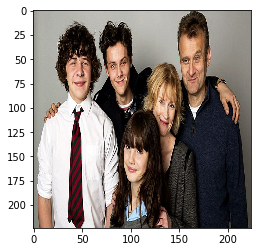

In [13]:
from matplotlib import pyplot
n = 1
pyplot.imshow(X_train[n])

#### Print an image array:

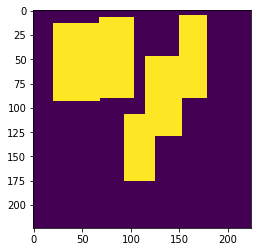

In [14]:
pyplot.imshow(masks_train[n])

#### Data augmentation:

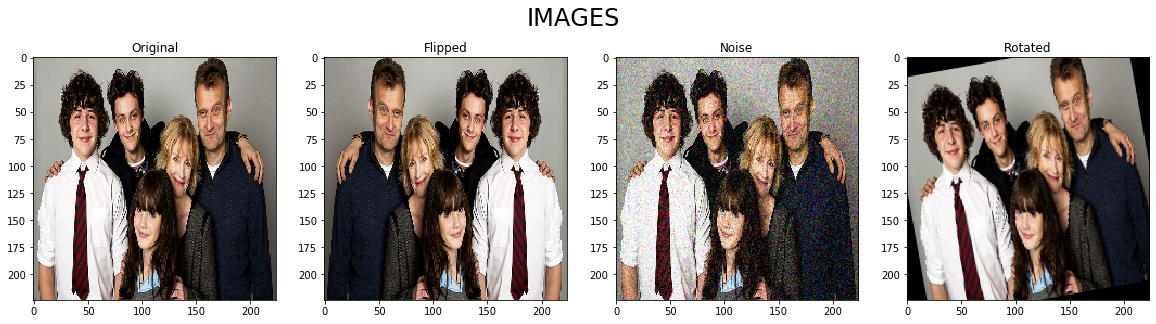

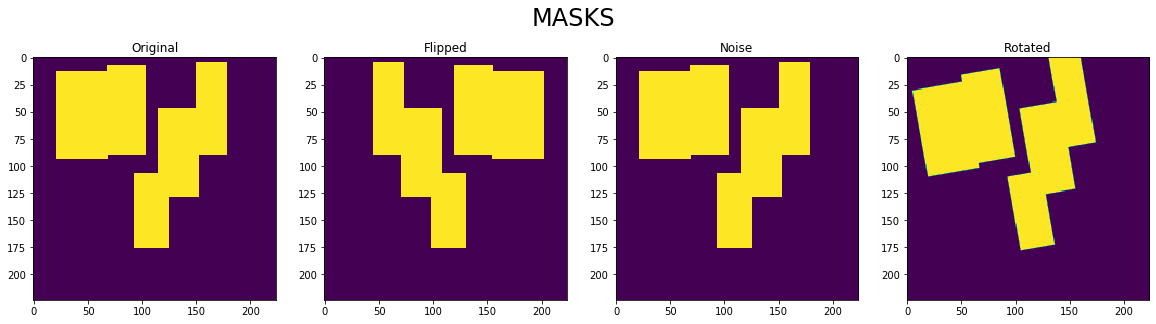

In [15]:
import random
import skimage as sk
from skimage import transform
from skimage import util

import matplotlib.pyplot as plt

n = 1
charts_length = 4
random_degree = round(random.uniform(-25, 25),2)
 
img1 = X_train[n]
img2 = X_train[n][:, ::-1]
img3 = sk.util.random_noise(X_train[n])
img4 = sk.transform.rotate(X_train[n], random_degree)
mask1 = masks_train[n]
mask2 =masks_train[n][:, ::-1]
mask3 = masks_train[n]
mask4 =sk.transform.rotate(masks_train[n], random_degree)
imgs = [img1, img2, img3, img4, mask1, mask2, mask3, mask4]
suptitles = ['IMAGES', 'MASKS']
titles = ['Original', 'Flipped', 'Noise', 'Rotated']

for i in range(0,2):
    charts_length = 4
    count = 1
    fig = plt.figure(figsize=(5*charts_length,5)) 
    fig.suptitle(suptitles[i], size=24)

    for c in range(0,charts_length): 
        plt.subplot(1,charts_length,count) 
        plt.title(titles[c]) 
        pyplot.imshow(imgs[c+4*i])
        count += 1
         
    plt.show() 

#### Apply the transformations to the entire test set:

In [0]:
from numpy import expand_dims

for i in range(0,len(X_train)):
    X_train = np.concatenate((X_train, expand_dims(X_train[i][:, ::-1],0)), axis=0)
    masks_train = np.concatenate((masks_train, expand_dims(masks_train[i][:, ::-1],0)), axis=0)
    
    X_train = np.concatenate((X_train, expand_dims(sk.util.random_noise(X_train[i]),0)), axis=0)
    masks_train = np.concatenate((masks_train, expand_dims(masks_train[i],0)), axis=0)
     
    random_degree = round(random.uniform(-25, 25),2)
    X_train = np.concatenate((X_train, expand_dims(sk.transform.rotate(X_train[i], random_degree),0)), axis=0)
    masks_train = np.concatenate((masks_train, expand_dims(sk.transform.rotate(masks_train[i], random_degree),0)), axis=0)

#### New inputs size:

In [17]:
print('The new shape of the training set is {}'.format(X_train.shape))
print('The new shape of the masks is {}'.format(masks_train.shape))

The new shape of the training set is (1616, 224, 224, 3)
The new shape of the masks is (1616, 224, 224)


#### Create the model:
- Add MobileNet as model with below parameter values

- Add UNET architecture layers


In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1, weights="imagenet") # Load pre-trained mobilenet

    for layer in model.layers[:-5]: # Retrain also the last 5 layers of the MobileNet
        layer.trainable = False

    x = model.layers[-1].output
    
    block0 = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    
    x = Reshape((IMAGE_WIDTH,IMAGE_HEIGHT))(x) 

    return Model(inputs=model.input, outputs=x)

#### Call the 'create_model' function:

In [19]:
import keras

# Clearing any previously created sessions
keras.backend.clear_session()

# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()




Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________________________

#### Define dice coefficient function:

In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

#### Define loss:

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

#### Compile the model:


In [0]:
model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

#### Define checkpoint and earlystopping:

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True, save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

#### Fit the model:

In [0]:
model.fit(X_train,
          masks_train, 
          epochs=50,
          batch_size = 1, 
          callbacks=[checkpoint, reduce_lr, stop],
          verbose=1)

Streaming output truncated to the last 5000 lines.
Epoch 00024: loss did not improve from 0.09851
 224/1616 [===>..........................] - ETA: 59s - loss: 0.4460 - dice_coefficient: 0.7842 
Epoch 00024: loss did not improve from 0.09851

Epoch 00024: loss did not improve from 0.09851
 226/1616 [===>..........................] - ETA: 59s - loss: 0.4451 - dice_coefficient: 0.7838
Epoch 00024: loss did not improve from 0.09851

Epoch 00024: loss did not improve from 0.09851
 228/1616 [===>..........................] - ETA: 59s - loss: 0.4444 - dice_coefficient: 0.7835
Epoch 00024: loss did not improve from 0.09851

Epoch 00024: loss did not improve from 0.09851
 230/1616 [===>..........................] - ETA: 59s - loss: 0.4449 - dice_coefficient: 0.7828
Epoch 00024: loss did not improve from 0.09851

Epoch 00024: loss did not improve from 0.09851
 232/1616 [===>..........................] - ETA: 59s - loss: 0.4440 - dice_coefficient: 0.7828
Epoch 00024: loss did not improve from 0.

#### Visualize the results:

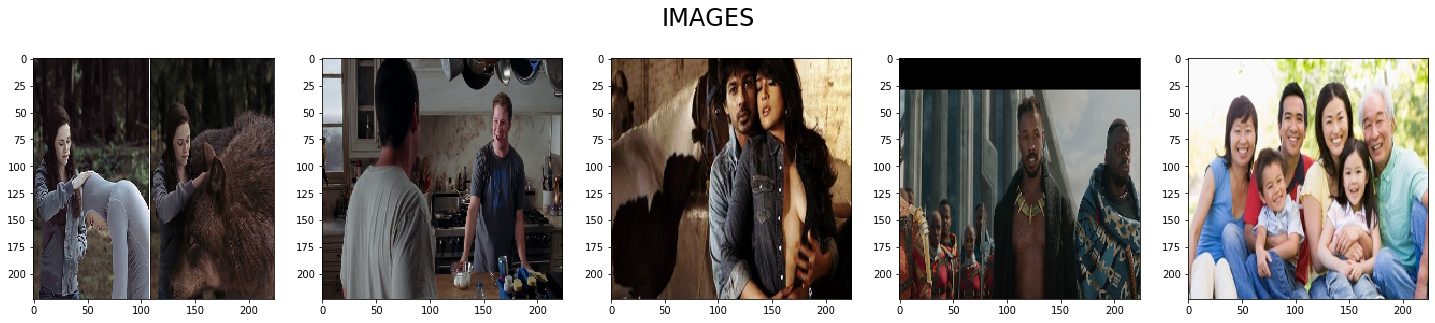

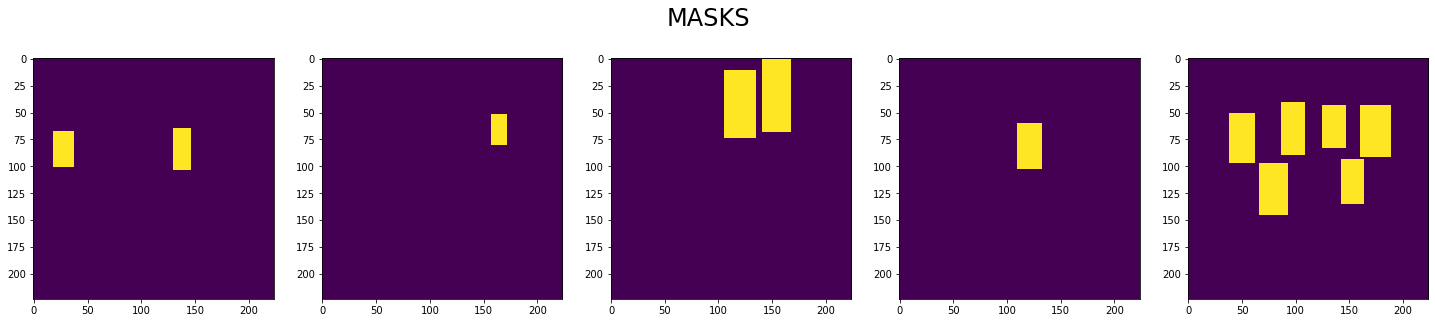

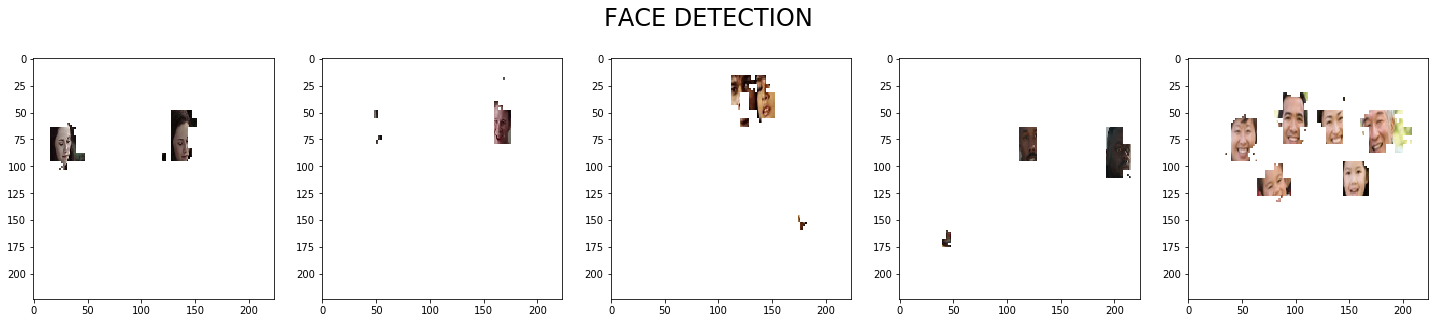

In [26]:
# Load trained model for testing
WEIGHTS_FILE = "model-0.10.h5"
model = create_model()
model.load_weights(WEIGHTS_FILE)

suptitles = ['IMAGES', 'MASKS', 'FACE DETECTION']

for i in range(0,3):
    charts_length = 5
    count = 1
    fig = plt.figure(figsize=(5*charts_length,5)) 
    fig.suptitle(suptitles[i], size=24)

    for c in range(0,charts_length): 
        plt.subplot(1,charts_length,count) 
        # plt.title(titles[c]) 
        if i==0:
            pyplot.imshow(X_test[c])
        if i==1:
            pyplot.imshow(masks_test[c])
        if i==2:
            image_test = X_test[c].copy()
            predicted_mask = model.predict(np.array([image_test]))[0]
            image_test[predicted_mask<0.5] = (1,1,1)
            pyplot.imshow(image_test)
        count += 1
    print('\n\n\n')
    plt.show() 